## Contenuti
- [Numpy](#Numpy)
    - [Import](#Import)
    - [Array](#Array)
    - [Shape](#Shape)
    - [Reshape](#Reshape)
    - [Tipi di dati](#Tipi-di-dati)
    - [Slicing](#Slicing)
    - [Operazioni algebriche tra vettori](#Operazioni-algebriche-tra-vettori)
    - [Operazioni algebriche tra matrici](#Operazioni-algebriche-tra-matrici)
        - [Calcolo della trasposta](#Calcolo-della-trasposta)
        - [Calcolo dell'inversa](#Calcolo-dell'inversa)
        - [Calcolo del determinante](#Calcolo-del-determinante)
        - [Somma e sottrazione tra matrici](#Somma-e-sottrazione-tra-matrici)
        - [Moltiplicazione matriciale](#Moltiplicazione-matriciale)
        - [Prodotto scalare](#Prodotto-scalare)
    - [Operazioni avanzate](#Operazioni-avanzate)
        - [Media e deviazione standard di un vettore](#Media-e-deviazione-standard-di-un-vettore)
        - [Trasformazione in scalare](#Trasformazione-in-scalare)
        - [Prodotto di vettori](#Prodotto-di-vettori)
        - [Somma degli elementi](#Somma-degli-elementi)
        - [Minimi e massimi di una matrice](#Minimi-e-massimi-di-una-matrice)
- [Il classificatore Bayesiano parametrico](#Il-classificatore-Bayesiano-parametrico)
    - [Import delle librerie](#Import-delle-librerie)
    - [Definizione del training set e del pattern di test](#Definizione-del-training-set-e-del-pattern-di-test)
    - [Calcolo del vettore medio](#Calcolo-del-vettore-medio)
    - [Calcolo della matrice di covarianza](#Calcolo-della-matrice-di-covarianza)
    - [Calcolo della densità di probabilità condizionale](#Calcolo-della-densità-di-probabilità-condizionale)
    - [Probabilità a posteriori](#Probabilità-a-posteriori)
        - [Probabilità a priori](#Probabilità-a-priori)
        - [Densità di probabilità assoluta](#Densità-di-probabilità-assoluta)
    - [Visualizzazione dei risultati](#Visualizzazione-dei-risultati)

# Esercitazione 2
La lezione odierna è suddivisa in due parti:
1. introduzione alla libreria **Numpy**
2. implementazione di un classificatore Bayesiano binario


# Numpy
Numpy è una libreria del linguaggio Python che permette di definire e manipolare vettori e matrici multidimensionali. 

Per via della sua facilità d'uso e del gran numero di operazioni messe a disposizione *out-of-the-box*, Numpy è diventato un punto di riferimento per qualsiasi applicazione di tipo scientifico. Questa libreria nasce con l'intento di sopperire alle mancanze delle strutture dati messe a disposizione nativamente da Python che risultano poco adatte ad applicazioni matematiche.

Di seguito vengono esposte le principali funzionalità messe a disposizione da Numpy. Per una lista completa si rimanda alla [documentazione ufficiale](https://docs.scipy.org/doc/numpy/reference/index.html).

## Import

Per prima cosa è necessario eseguire l'import del relativo modulo. La libreria viene convenzionalmente importata con il nome **np**.

In [85]:
import numpy as np

## Array

Al contrario delle liste di Python, gli array di Numpy (**ndarray** - *n-dimensional array*) sono omogenei, cioè possono contenere solamente elementi dello stesso tipo. Inoltre le operazioni aritmetiche e di manipolazione messe a disposizione risultano essere particolarmente ottimizzate.

L'inizializzazione di un **ndarray** è affidata alla funzione **array(...)**. Nella sua versione base la funzione accetta come parametro una lista di valori.

In [86]:
# Definisce un vettore contenente gli elementi da 0 a 5
vector = np.array([0, 1, 2, 3, 4, 5])
print(type(vector))
print('Contenuto di vector:', vector)

<class 'numpy.ndarray'>
Contenuto di vector: [0 1 2 3 4 5]


Si noti che in Numpy un array monodimensionale viene rappresentato come vettore **riga** (mentre solitamente in matematica quando si parla di vettori ci si riferisce a vettori colonna). 

È possibile accedere ai singoli elementi con la sintassi vista per liste e tuple:

In [ ]:
# Accesso in lettura
print(vector[0])

# Accesso in scrittura
vector[2] = 5
print(vector)

vector = np.array([0, 1, 2, 3, 4, 5]) # Ripristina i valori originali

Numpy è in grado di gestire **ndarray** multidimensionali.

Di seguito un esempio di dichiarazione di un **ndarray** bi-dimensionale, cioè una matrice. È possibile dichiarare una matrice utilizzando la funzione **array(...)**. In questo caso il parametro consiste in una lista di liste: ogni sottolista descrive il contenuto di una riga. Le liste devono essere di lunghezza identica.

In [4]:
# Dichiarazione di una matrix 2x3
matrix = np.array([[0,1,2], [3,4,5]])
print('Contenuto della matrice:\n', matrix)

# Accesso agli elementi di una matrice
print(matrix[1][2])
# Sintassi equivalente
print(matrix[1, 2])

Contenuto della matrice:
 [[0 1 2]
 [3 4 5]]
5
5


Numpy mette a disposizione diverse funzioni per la creazione degli array:

In [5]:
# Dichiarazione di una matrice 2x2 inizializzata con tutti gli elementi a 0 
a = np.zeros((2,2))   
print('Zeros:\n', a)
print() 
        
# Dichiarazione di una matrice 1x2 inizializzata con tutti gli elementi a 1 
b = np.ones((1,2))    
print('Ones:\n', b)
print() 

# Dichiarazione di una matrice 2x2 inizializzata con tutti gli elementi a un valore costante 
c = np.full((2,2), 7)  
print('Full:\n', c)
print() 

# Dichiarazione di una matrice identità 3x3
d = np.eye(3)
print('Eye:\n', d)
print() 

# Dichiarazione di una matrice 4x3 contenete valori casuali
e = np.random.random((4,3))
print('Random:\n', e)

Zeros:
 [[0. 0.]
 [0. 0.]]

Ones:
 [[1. 1.]]

Full:
 [[7 7]
 [7 7]]

Eye:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Random:
 [[0.52250469 0.11613444 0.03521488]
 [0.99407713 0.70598823 0.56916976]
 [0.72399734 0.97997262 0.5579037 ]
 [0.29734019 0.73598404 0.52744124]]


## Shape
Si definisce **rank** il numero di dimensioni di un array e **shape** una tupla di interi che esprimono la lunghezza di ciascuna dimensione.

Per comprendere meglio questo concetto si consideri la variabile *vector*: si tratta di un vettore di *rank* 1 e *shape* (6,) (cioè una tupla contenente un solo elemento).

Per ottenere la *shape* di un **ndarray** è sufficiente accederne al relativo attributo, come mostrato nella cella seguente:

In [6]:
print('Rank di vector:', len(vector.shape))
print('Shape di vector :', vector.shape)

print('Rank di matrix:', len(matrix.shape))
print('Shape di matrix :', matrix.shape)

Rank di vector: 1
Shape di vector : (6,)
Rank di matrix: 2
Shape di matrix : (2, 3)


## Reshape
Un **ndarray** può essere manipolato in maniera tale da poter creare un array con *shape* differente a partire dal contenuto iniziale.

Nell'esempio che segue *vector* è trasformato nell'equivalente vettore colonna utilizzando la funzione **reshape(...)**.

In [87]:
# Trasformazione in vettore colonna
column_vector = vector.reshape((6, 1))

print('Contenuto di column_vector:\n', column_vector)

# Nota: l'array originale non è stato modificato
print('vector originale:', vector)

Contenuto di column_vector:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
vector originale: [0 1 2 3 4 5]


Il parametro della funzione **reshape(...)** deve essere una tupla che descrive la *shape* dell'array di output. In questo caso si vuole che gli stessi dati contenuti in *row_vector* vengano utilizzati per creare una matrice di 6 righe e 1 colonna. Il risultato si riflette nell'attributo shape del vettore ottenuto:

In [ ]:
print('Rank vettore colonna:', len(column_vector.shape))
print('Shape vettore colonna:', column_vector.shape)

A partire dal vettore colonna è possibile riottenere il relativo vettore riga utilizzando nuovamente utilizzando la funzione **reshape(...)**.

In [ ]:
row_vector = column_vector.reshape((1, 6))

print('Contenuto di row_vector:\n', row_vector)
print('Rank di row_vector:', len(row_vector.shape))
print('Shape di row_vector:', row_vector.shape)

Nota: il *row_vector* così ottenuto non è identico al *vector* originale. Si noti come **print(...)** restituisca *\[\[0 1 2 3 4 5\]\]* per *row_vector* e *\[0 1 2 3 4 5\]* per *vector*.

Questo è dovuto al fatto che *row_vector* ha dimensioni *(1, 6)* mentre *vector* ha dimensioni *(6,)*. In altre parole *row_vector* è una matrice 1x6 mentre *vector* è un array monodimensionale (o vettore riga).

La seguente operazione restituirà esattamente il vettore originale. 

In [ ]:
print(column_vector.reshape( (6,) ))

# Per array monodimensionali è possibile passare a reshape(...) un singolo valore
print(column_vector.reshape(  6  ))

## Tipi di dati
Gli array di Numpy sono una griglia di elementi dello stesso tipo. Il tipo di dato degli elementi viene automaticamente inferito da Numpy oppure può essere specificato nella funzione di inizializzazione come parametro opzionale:

In [7]:
x = np.array([1, 2]) # Numpy sceglie il tipo di dati
print(x.dtype)

x = np.array([1.0, 2.0]) # Numpy sceglie il tipo di dati
print(x.dtype)

x = np.array([1, 2], dtype=np.int64) # Forza un tipo di dati                    
print(x.dtype)

int32
float64
int64


## Slicing
Lo *slicing* si applica anche agli **ndarray** ma, a differenza di quanto avviene per le liste, è possibile applicarlo a ogni dimensione dell'array.

In [8]:
# Crea un ndarray bi-dimensionale di shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print()

# Slicing per ottenere una sotto-matrice formata dagli elementi
# delle prime 2 righe in corrispondenza delle colonne 1 e 2
b = a[:2, 1:3]
print(b)
print()

# Uno slice crea una vista, non una copia dei dati
# Modificare uno slice equivale a modificare l'ndarray originale
print(a[0, 1])
b[0, 0] = 77
print(a[0, 1])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[[2 3]
 [6 7]]

2
77


## Operazioni algebriche tra vettori
Numpy mette a disposizione le più comuni operazioni algebriche attraverso gli operatori visti per le variabili numeriche (+, -, *, /):

In [9]:
# Reminder: vector = [0, 1, 2, 3, 4, 5]

# Moltiplicazione di un vettore per uno scalare
vector_scalar_prod = vector * 5

# Divisione di un vettore per uno scalare
vector_scalar_div = vector / 5

print('Prodotto per uno scalare:\n', vector_scalar_prod)
print('Divisione per uno scalare:\n', vector_scalar_div)

Prodotto per uno scalare:
 [ 0  5 10 15 20 25]
Divisione per uno scalare:
 [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
vect1 = np.array([1,2,6])
vect2 = np.array([5,2,3])

# Somma tra vettori
vector_sum = vect1 + vect2

# Sottrazione tra vettori
vector_sub = vect1 - vect2

print('Somma:\n', vector_sum)
print('Sottrazione:\n', vector_sub)

Nota: l'operatore *'+'*, quando applicato a due liste "native" di Python, esegue una concatenazione. Tuttavia se lo stesso operatore viene applicato a due **ndarray** quella che si ottiene è una somma algebrica.

## Operazioni algebriche tra matrici
Come già accennato, le matrici possono essere rappresentate tramite **ndarray** di *rank* 2. Numpy mette a disposizione diverse funzioni frequentemente utilizzate nel calcolo matriciale quali: calcolo della trasposta, dell'inversa, del determinante, del prodotto tra matrici, ecc.

### Calcolo della trasposta
È possibile calcolare la trasposta di una matrice richiamando il metodo **.transpose(...)**, oppure utilizzando l'attributo **.T**. In alternativa è anche disponibile la relativa funzione di libreria **np.transpose(...)**.

In [ ]:
matrix = np.array([[0,1,2], [3,4,5]])
print('Matrix:\n', matrix)

# Calcolo della trasposta
matrix_transp = matrix.transpose()
print('\nTrasposta di matrix:\n', matrix_transp)

# In maniera equivalente
matrix_transp = matrix.T
matrix_transp = np.transpose(matrix)

### Calcolo dell'inversa
È possibile calcolare l'inversa di una matrice utilizzando la funzione di libreria **np.linalg.inv(...)**.

In [ ]:
# Definizione di una matrice quadrata
matrix2 = np.array([[12,-1,0],
                    [7,6,-5],
                    [1,6,9]])

# Calcolo dell'inversa
matrix2_inv = np.linalg.inv(matrix2)           
print('Inversa matrix2:\n', matrix2_inv)

### Calcolo del determinante
È possibile calcolare il determinante di una matrice utilizzando la funzione di libreria **np.linalg.det(...)**.

In [ ]:
# Calcolo del determinante
matrix2_det = np.linalg.det(matrix2)
print('Determinante matrix2:', matrix2_det)

### Somma e sottrazione tra matrici
Esattamente come visto per i vettori, la somma tra matrici è delegata all'operatore "**+**".

In [ ]:
# Reminder: matrix = np.array([[0,1,2], [3,4,5]])
print('matrix:\n', matrix)
print()

# Somma e sottrazione (elemento per elemento) di due matrici
matrix3 = np.array([[5,2,6],
                    [8,12,1]])
print('matrix3:\n', matrix3)
print()

matrix_sum = matrix + matrix3
print('Somma:\n', matrix_sum)
print()

matrix_sub = matrix - matrix3
print('Sottrazione:\n', matrix_sub)

### Moltiplicazione matriciale
La moltiplicazione matriciale è affidata al metodo **.dot(...)**. Questo metodo deve essere richiamato sulla matrice sinistra passando come parametro la matrice destra. In alternativa è possibile utilizzare la funzione di libreria **np.dot(...)** oppure l'operatore **@**.

In [ ]:
# Reminder: matrix = [[0,1,2], 
#                      [3,4,5]]
#
#           matrix2 = [[12,-1,0],
#                      [7,6,-5],
#                      [1,6,9]]
print('matrix:\n', matrix)

print('\nmatrix2:\n', matrix2)

# Moltiplicazione matriciale tra le matrici "matrix1" e "matrix2"
mul1 = matrix.dot(matrix2)
print('\nMoltiplicazione tra matrici:\n', mul1)

# In maniera equivalente
mul2 = np.dot(matrix, matrix2)
mul2 = matrix @ matrix2

### Prodotto scalare
Utilizzando il metodo **.dot(...)** tra un vettore riga e un vettore colonna è possibile calcolare il loro prodotto scalare.

In [ ]:
# Prodotto scalare di due vettori (riga*colonna)
row_vector = column_vector.reshape((1, 6))

mul2 = row_vector.dot(column_vector)
print('mul2:', mul2)

Attenzione perchè Numpy non restituisce un valore scalare ma una matrice di dimensione 1x1.

In [ ]:
print(mul2.shape)

## Operazioni avanzate
Di seguito sono elencate alcune delle operazioni avanzate messe a disposizione da Numpy. Alcune di queste potrebbero essere particolarmente utili per lo svolgimento delle esercitazioni.

La [documentazione ufficiale](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) di **ndarray** contiene la lista completa delle operazioni supportate.

### Media e deviazione standard di un vettore
È possibile calcolare media e deviazione standard utilizzando i metodi **.mean(...)** e **.std(...)**.

In [ ]:
print('row_vector:', row_vector)
print('Media:', row_vector.mean())
print('Deviazione standard:', row_vector.std()) 

### Trasformazione in scalare
È possibile trasformare un **ndarray** 1x1 in uno scalare.

In [ ]:
# sc = np.asscalar(mul2)  # Deprecato
sc = mul2.item()
print('Scalare:', sc)

### Prodotto di vettori
Il prodotto tra vettori è gestito in maniera diversa a seconda della *shape* dei vettori coinvolti. Se entrambi i vettori hanno rango 2, è possibile usare indistintamente **.dot(...)**, **\*** o **\@** per eseguire la loro moltiplicazione algebrica. È possibile ottenere lo stesso risultato anche se il vettore di destra (riga) è di rango 1 (il vettore di sinistra deve comunque essere di rango 2): in questo caso è necessario utilizzare l'operatore **\*** mentre gli operatori **.dot(...)** e **\@** restituiranno un errore.

In [ ]:
rank_one_vector = np.array([0, 1, 2, 3, 4, 5])
print('column_vector shape:', column_vector.shape)
print('row_vector shape:', row_vector.shape)
print('rank_one_vector shape:', rank_one_vector.shape)
print()

# Moltiplicazione algebrica tra vettori: entrambi i vettori di rango 2
mul3dot = column_vector.dot(row_vector)
mul3at = column_vector @ row_vector # <-- In alternativa
mul3asterisk = column_vector * row_vector # <-- In alternativa
print('mul3dot:\n', mul3dot)
print()
print('mul3at:\n', mul3at)
print()
print('mul3asterisk:\n', mul3asterisk)
print()

# Moltiplicazione algebrica tra vettori: vettore di destra di rango 1
mul4 = column_vector * rank_one_vector
# mul4 = column_vector @ rank_one_vector # <-- Errore!
# mul4 = column_vector.dot(rank_one_vector) # <-- Errore!
print('mul4:\n', mul4)

Si deve prestare particolare attenzione nel caso in cui entrambi i vettori siano di rango 1: 
- applicando l'operatore **\@** si otterrà il prodotto scalare (senza la necessità di utilizzare **.asscalar()**);
- utilizzando l'operatore **\*** si otterrà un nuovo vettore ottenuto moltiplicando elemento per elemento i vettori originali.

In [ ]:
# Prodotto scalare (senza usare .asscalar())
mul5 = rank_one_vector @ rank_one_vector
print('mul5:', mul5)

# Moltiplicazione elemento per elemento
mul6 = rank_one_vector * rank_one_vector
print('mul6:', mul6)

### Somma degli elementi
La somma degli elementi è affidata al metodo **.sum(...)** o alla funzione di libreria **np.sum(...)**.

In [4]:
# Somma degli elementi di un vettore
print(row_vector)
print('Somma:', row_vector.sum())
print()

# Reminder: matrix3 = [[5,2,6],
#                      [8,12,1]]
print('matrix3:\n', matrix3)
print()

# Somma degli elementi di una matrice
elements_sum = matrix3.sum()
print('Somma:', elements_sum)

# Somma degli elementi di una matrice per riga
elements_row_sum = matrix3.sum(axis=1)
print('Somma per riga:', elements_row_sum)

# Somma degli elementi di una matrice per colonna
elements_column_sum = matrix3.sum(axis=0)
print('Somma per colonna:', elements_column_sum)

NameError: name 'row_vector' is not defined

### Minimi e massimi di una matrice
Allo stesso modo è possibile ottenere i minimi e i massimi per riga o colonna utilizzando i metodi **.min(...)** e **.max(...)**. Anche per queste sono disponibili le funzioni di libreria **np.min(...)** e **np.max(...)**.

In [ ]:
row_vector2 = np.array([0, 1, 2, 3, 4, 5])
print('row_vector2:', row_vector2)

print('Minimo:', row_vector2.min())
print('Massimo:', row_vector2.max())
print()

# Reminder: matrix3 = [[5,2,6],
#                      [8,12,1]]
print('matrix3:\n', matrix3)

# Minimi delle righe di una matrice
mins = matrix3.min(axis=1)
print('Minimi delle righe:', mins)

# Massimi delle colonne di una matrice
maxs = matrix3.max(axis=0)
print('Massimi delle colonne:', maxs)

Se invece si desidera ottenere gli indici di tali elementi, è possibile utilizzare i metodi **.argmin(...)** e **.argmax(...)**.

In [ ]:
# Indici posizionali dei minimi delle righe di una matrice
min_indices = matrix3.argmin(axis=1)
print('Indici dei minimi:\n', min_indices)

# Indici posizionali dei massimi delle colonne di una matrice
max_indices = matrix3.argmax(axis=0)
print('Indici dei massimi:\n', max_indices) 

# Il classificatore Bayesiano parametrico
Implementare un classificatore di Bayes parametrico (multinormale) per stimare il genere di un individuo con peso e altezza rispettivamente pari a 57kg e 168cm.

## Import delle librerie
Il primo passo consiste nell'eseguire l'import delle librerie utilizzate.

Oltre alle librerie Numpy e Matplotlib, si dovranno importare due ulteriori librerie che verranno utilizzate per la visualizzazione dei risultati (**itertools**, **ml_visualization**).

In [2]:
import matplotlib.pyplot as plt  # Matplotlib, per la visualizzazione dei risultati
import matplotlib  # Import del package principale, contenente costanti utili
import numpy as np  # Numpy
import itertools

import ml_visualization

## Definizione del training set e del pattern di test
I dati riportati in tabella rappresentano il training set con cui verrà addestrato il classificatore (le classi *Maschio* e *Femmina* sono qui denominate rispettivamente *W1* e *W2*).
<img src="Tabella_trainingset.png" alt="Tabella training set" style="width: 250px;"/>

Di seguito la definizione del training set e del pattern di test e la relativa visualizzazione su un piano cartesiano.

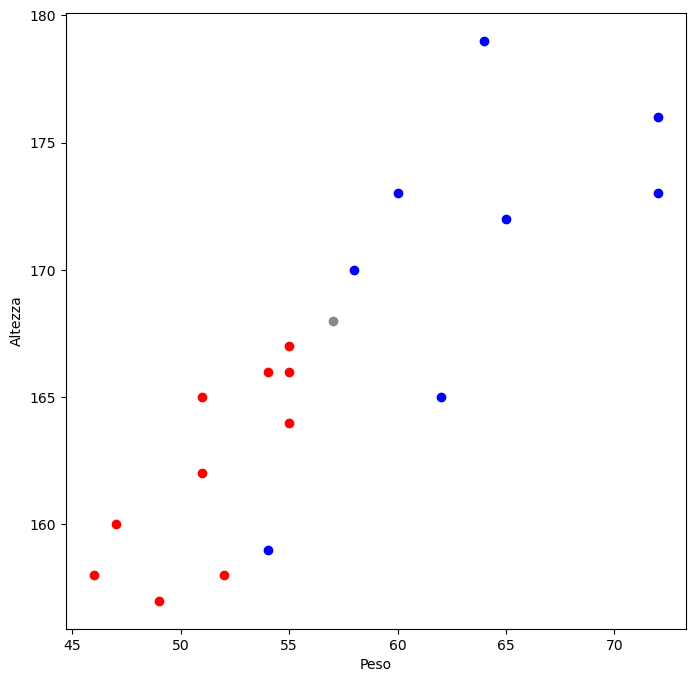

In [3]:
# Definizione del training set
patterns_W1 = np.array([[72, 173], [54, 159], [65, 172], [58, 170],
                        [62, 165], [72, 176], [60, 173], [64, 179]])
patterns_W2 = np.array([[55, 166], [46, 158], [52, 158], [47, 160], [55, 167],
                        [54, 166], [55, 164], [49, 157], [51, 165], [51, 162]])

# Definizione del pattern di test
X = np.array([57, 168])

# Visualizzazione dei dati. Il pattern di test è visualizzato in grigio
plt.scatter(patterns_W1[:, 0], patterns_W1[:, 1], c='#0000FF')
plt.scatter(patterns_W2[:, 0], patterns_W2[:, 1], c='#FF0000')
plt.scatter(X[0], X[1], c='#888888')
plt.xlabel('Peso')
plt.ylabel('Altezza')
plt.show()

# Calcolo del numero di pattern per le due classi
pattern_count_W1 = patterns_W1.shape[0]
pattern_count_W2 = patterns_W2.shape[0]

## Calcolo del vettore medio
Si completi la funzione **compute_mean(...)** senza utilizzare la funzione **mean(...)** di Numpy. Questa deve restituire il vettore medio di un insieme di pattern di input.

Il vettore medio è dato da:

$\Large{\boldsymbol{\mu}=\frac{1}{n}\sum_{i=1..n}\boldsymbol{x}_i}$

In [16]:
# Esercizio 1: implementare il calcolo dei vettori medi
def compute_mean(patterns):
    mean = np.zeros(2)

    patterns_count=patterns.shape[0]
    mean=patterns.sum(axis=0)/patterns_count
    
    return mean


# Calcolo dei vettori medi
mu_W1 = compute_mean(patterns_W1)
mu_W2 = compute_mean(patterns_W2)

print('Vettore medio mu1:', mu_W1)
print('Vettore medio mu2:', mu_W2)

Vettore medio mu1: [ 63.375 170.875]
Vettore medio mu2: [ 51.5 162.3]


## Calcolo della matrice di covarianza
Si completi la funzione **compute_covariance_matrix(...)** senza utilizzare la funzione **cov(...)** di Numpy. Questa deve restituire la matrice di covarianza di un insieme di pattern di input dato il vettore medio.

La matrice di covarianza è data da:

$\Large{\boldsymbol{\Sigma}=\frac{1}{n}\sum_{i=1..n}(\boldsymbol{x}_i-\boldsymbol{\mu})(\boldsymbol{x}_i-\boldsymbol{\mu})^t}$

In [63]:
# Esercizio 2: implementare il calcolo delle matrici di covarianza
def compute_covariance_matrix(patterns, mean):
    return ((patterns-mean).T @ (patterns - mean)) / len(patterns)


# Calcolo delle matrici di covarianza
cov_mat_W1 = compute_covariance_matrix(patterns_W1, mu_W1)
cov_mat_W2 = compute_covariance_matrix(patterns_W2, mu_W2)

print('Matrice di covarianza per W1:\n', cov_mat_W1)
print('\nMatrice di covarianza per W2:\n', cov_mat_W2)

Matrice di covarianza per W1:
 [[35.234375 23.296875]
 [23.296875 34.859375]]

Matrice di covarianza per W2:
 [[10.05  8.85]
 [ 8.85 13.01]]


## Calcolo della densità di probabilità condizionale
Prima di poter calcolare la densità di probabilità condizionale è necessario calcolare la matrice inversa e il determinante delle due matrici di covarianza.

In [65]:
# Determinanti delle matrici di covarianza
det_cov_mat_W1 = np.linalg.det(cov_mat_W1)
det_cov_mat_W2 = np.linalg.det(cov_mat_W2)
print('Determinante cov_mat_W1:', det_cov_mat_W1)
print('Determinante cov_mat_W2:', det_cov_mat_W2)

# Inverse delle matrici di covarianza
inv_cov_mat_W1 = np.linalg.inv(cov_mat_W1)
inv_cov_mat_W2 = np.linalg.inv(cov_mat_W2)
print('Inversa cov_mat_W1:\n', inv_cov_mat_W1)
print('\nInversa cov_mat_W2:\n', inv_cov_mat_W2)

Determinante cov_mat_W1: 685.5039062500001
Determinante cov_mat_W2: 52.42800000000001
Inversa cov_mat_W1:
 [[ 0.05085219 -0.03398504]
 [-0.03398504  0.05139923]]

Inversa cov_mat_W2:
 [[ 0.24814984 -0.16880293]
 [-0.16880293  0.19169146]]


Si implementi la funzione **compute_density(...)** che calcoli la densità di probabilità condizionale di un pattern $\textit{x}$ dati il vettore medio *mean*, l'inversa della matrice di covarianza *inv_cov_matrix* e il determinante *det*.

La formula per il calcolo della densità di probabilità condizionale è:


$\Large{p(\boldsymbol{x}|w_i)=\frac{1}{(2π)^{d/2} |\boldsymbol{\Sigma}_i|^{1/2}}e^{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_i)^t \boldsymbol{\Sigma}_i^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_i)}}$

In [83]:
# Esercizio 3: implementare il calcolo delle densità di probabilità condizionali
def compute_density(x, mean, inv_cov_matrix, det):
    # Costante pi greca: np.pi
    d = 2
    # Σ = matrice di covarianza
    # np.exp(5) = e⁵ (calcolo esponenziale)
    # |Σ| = determinante della matrice di covarianza
    # Σ⁻¹ = inversa della matrice di covarianza
    # ...
    diff_row= x - mean
    diff_row = diff_row.reshape(1,2)
    diff_column = diff_row.T
    
    denominator = 2*np.pi*np.sqrt(det)
    numerator=np.exp(-0.5 * diff_row @ (inv_cov_matrix @ diff_column)).item()
    
    return numerator/denominator
    
# Densità di probabilità condizionali
p_X_W1 = compute_density(X, mu_W1, inv_cov_mat_W1, det_cov_mat_W1)
p_X_W2 = compute_density(X, mu_W2, inv_cov_mat_W2, det_cov_mat_W2)

print('Densità di probabilità condizionale p(X|w1) = ', p_X_W1)
print('Densità di probabilità condizionale p(X|w2) = ', p_X_W2)

Densità di probabilità condizionale p(X|w1) =  0.003260652456957731
Densità di probabilità condizionale p(X|w2) =  0.00454867265331388


## Probabilità a posteriori
Prima di porter calcolare la probabilità a posteriori $\large{P(w_{i} | \boldsymbol{x})}$ è necessario stimare:
- la probabilità a priori;
- la densità di probabilità assoluta.

### Probabilità a priori
La probabilità a priori può essere stimata utilizzando la formula seguente:

$\large{P(w_i)=\frac{|w_i |}{|W|}}$ 

In [88]:
# Probabilità a priori
all_patterns_count = pattern_count_W1 + pattern_count_W2
p_W1 = pattern_count_W1 / all_patterns_count
p_W2 = pattern_count_W2 / all_patterns_count

print('Probabilità a priori p(w1) = ', p_W1)
print('Probabilità a priori p(w2) = ', p_W2)

Probabilità a priori p(w1) =  0.4444444444444444
Probabilità a priori p(w2) =  0.5555555555555556


### Densità di probabilità assoluta
La densità di probabilità assoluta può essere calcolata come:

$\Large{p(\boldsymbol{x})=\sum_{i=1}^s p(\boldsymbol{x}|w_i)P(w_i)}$

In [89]:
# Densità di probabilità assoluta
p_x = p_X_W1 * p_W1 + p_X_W2 * p_W2
print('Densità di probabilità assoluta p(X) = ', p_x)

Densità di probabilità assoluta p(X) =  0.003976219232711147


Infine la probabilità a posteriori può essere stimata come: 

$\Large{P(w_i|\boldsymbol{x})=\frac{p(\boldsymbol{x}|w_i )P(w_i )}{p(\boldsymbol{x})}}$

In [90]:
# Probabilità a posteriori
p_W1_X = p_X_W1 * p_W1 / p_x
p_W2_X = p_X_W2 * p_W2 / p_x

print('Probabilità a posteriori p(w1|X) = ', p_W1_X)
print('Probabilità a posteriori p(w2|X) = ', p_W2_X)

Probabilità a posteriori p(w1|X) =  0.3644615110346626
Probabilità a posteriori p(w2|X) =  0.6355384889653375


Il pattern di test è assegnato alla classe *b* per cui è massima la probabilità a posteriori:

$\Large{b=\underset{i=1..s}{\arg\max}\{P(w_i|\boldsymbol{x})\}}$

In questo caso il pattern è assegnato alla classe *W2 (Femmine)*, essendo $\large{P(w_2|\boldsymbol{x}) > P(w_1|\boldsymbol{x})}$.

## Visualizzazione dei risultati
Di seguito è proposta una rappresentazione grafica dei risultati ottenuti. Il codice crea un piano cartesiano in cui sono visualizzati:
1. I pattern del training set, di colore blu per i "Maschi" e di colore rosso per le "Femmine";
2. Il pattern di test, di colore grigio;
3. Uno sfondo che rappresenta la probabilità a posteriori nelle diverse parti del piano.

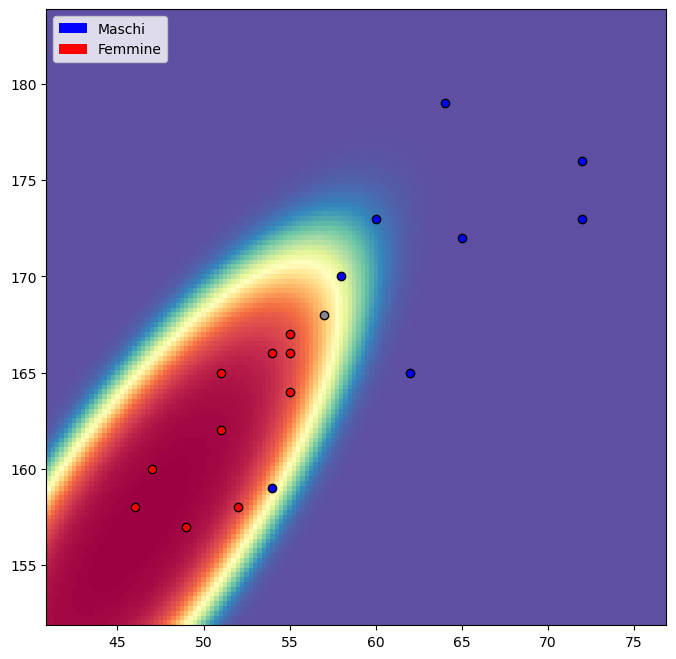

In [91]:
def calculate_probability_map(means, inv_covariance_matrices, det_cov_matrices, prior_probabilities,
                              x_min, x_max, y_min, y_max, step):
    x_range = np.arange(x_min, x_max, step)
    y_range = np.arange(y_min, y_max, step)

    probability_map = np.zeros((y_range.shape[0], x_range.shape[0]))

    for i, j in itertools.product(range(y_range.shape[0]), range(x_range.shape[0])):
        p = np.array([x_range[j], y_range[i]])
        densities = np.array(
            [compute_density(p, means[i], inv_covariance_matrices[i], det_cov_matrices[i]) for i in range(len(means))])
        px = (densities * prior_probabilities).sum()
        probabilities = np.array([densities[i] * prior_probabilities[i] / px for i in range(0, len(means))])
        probability_map[i, j] = probabilities[0]

    return probability_map, x_range, y_range


# Calcolo delle aree di probabilità
x_min, x_max, y_min, y_max = ml_visualization.calculate_2D_min_max(np.concatenate((patterns_W1, patterns_W2)), 5)
probability_map, x_range, y_range = calculate_probability_map(np.array([mu_W1, mu_W2]),
                                                            np.array([inv_cov_mat_W1, inv_cov_mat_W2]),
                                                            np.array([det_cov_mat_W1, det_cov_mat_W2]),
                                                            np.array([p_W1, p_W2]),
                                                            x_min, x_max, y_min, y_max, 0.25)

# Disegno delle aree di probabilità
colors = ml_visualization.get_colors_from_colormap(plt.cm.RdBu, 0.001)
ml_visualization.decisionboundaries_drawing(0, x_range, y_range, probability_map, matplotlib.colors.ListedColormap(colors))

# Plotting dei patterns
ml_visualization.plotting_patterns(0, patterns_W1, '#0000FF', 36)
ml_visualization.plotting_patterns(0, patterns_W2, '#FF0000', 36)
ml_visualization.plotting_patterns(0, np.array([X]), '#888888', 36)

# Disegno della legenda
colors = ['#0000FF', '#FF0000']
labels = ['Maschi', 'Femmine']
ml_visualization.legend_drawing(0, colors, labels, 2)

plt.show()